# Notebook per la Fase di Valutazione

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

## Caricamento del modello e dei dati

In [4]:
# Ricostruzione dei dati di test
from sklearn.model_selection import train_test_split

# Caricamento del dataset originale
data = pd.read_csv('prepared_cardio_train.csv')

# Separazione delle feature e del target
X = data.drop('cardio', axis=1)
y = data['cardio']

# Divisione in training e test set
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Caricamento del modello
model = joblib.load('svm_cardio_model.pkl')

# Predizione sui dati di test
y_pred = model.predict(X_test)
y_prob = model.decision_function(X_test)

## Report di classificazione

In [5]:
print("Report di classificazione:\n")
print(classification_report(y_test, y_pred))

Report di classificazione:

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6879
           1       0.76      0.66      0.71      6751

    accuracy                           0.73     13630
   macro avg       0.73      0.73      0.73     13630
weighted avg       0.73      0.73      0.73     13630



## Matrice di confusione

La matrice di confusione consente di analizzare gli errori del modello evidenziando i falsi positivi e i falsi negativi. Questo aiuta a identificare le aree di miglioramento e a valutare la distribuzione degli errori tra le classi.


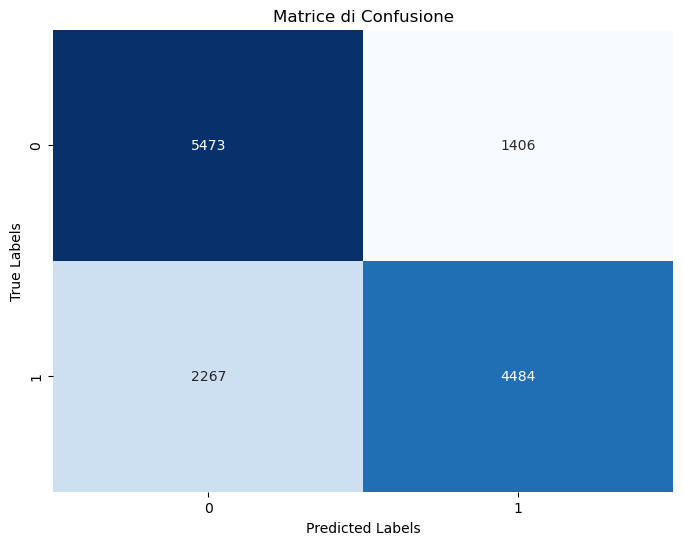

In [11]:
# Calcolo della matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# Creazione del plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice di Confusione')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Curva ROC e AUC

La curva ROC e l'AUC (Area Under the Curve) sono metriche fondamentali per valutare la capacità del modello di distinguere tra le classi. Una curva ROC vicina all'angolo superiore sinistro indica un'alta qualità del modello.


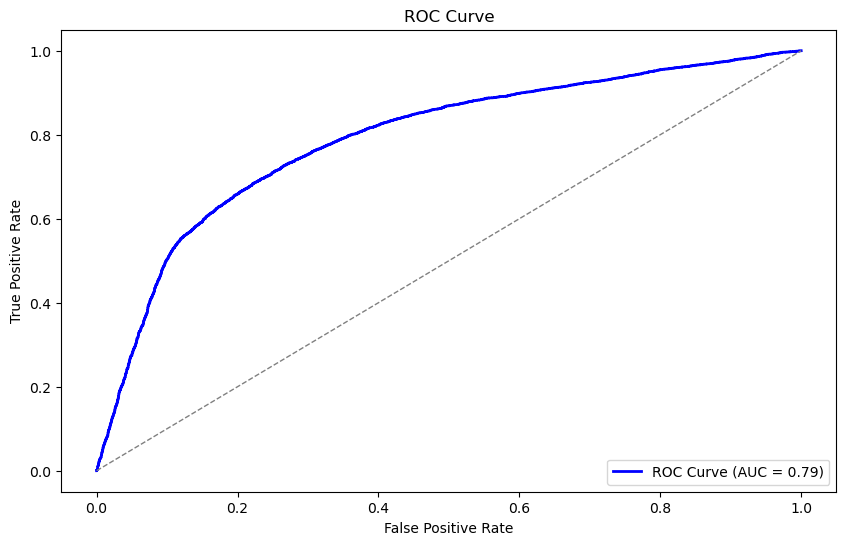

In [12]:
# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Analisi della Curva ROC

La curva ROC (Receiver Operating Characteristic) e il valore AUC (Area Under the Curve) sono strumenti cruciali per valutare le prestazioni di un classificatore binario. Di seguito l'analisi basata sulla curva mostrata:

## Interpretazione della Curva ROC

### Forma della curva:
- La curva ROC è relativamente distante dalla diagonale (linea grigia), suggerendo che il modello ha una buona capacità di distinguere tra le classi **"Malattia Cardiovascolare"** e **"Nessuna Malattia Cardiovascolare"**.
- La curva mostra un miglioramento graduale del **TPR (True Positive Rate)** rispetto al **FPR (False Positive Rate)**, con una buona separazione.

### Punto iniziale:
- La curva parte dal punto **(0, 0)**, indicando che con una soglia molto alta (nessun positivo predetto), non ci sono falsi positivi o veri positivi.

### Punto finale:
- La curva termina nel punto **(1, 1)**, quando tutti i campioni sono classificati come positivi.

## Valutazione dell'AUC

### Valore di AUC = 0.79:
- Questo valore è un indicatore quantitativo delle performance del modello.
- Un **AUC di 0.79** indica che il modello è abbastanza buono nel separare le due classi, con un'accuratezza complessiva del **79%** nel distinguere correttamente le classi in diverse soglie.

### Confronto:
- **AUC vicino a 1.0**: Perfetta separazione tra classi.
- **AUC di 0.5**: Prestazioni casuali (la curva si confonderebbe con la diagonale).

## Osservazioni principali

### Bilanciamento delle classi:
- La curva ROC mostra una buona progressione, ma un'ulteriore ottimizzazione del recall potrebbe spostare la curva più vicino all'angolo in alto a sinistra, migliorando l'AUC.

### Soglia ideale:
- L'analisi della curva può essere utilizzata per identificare la soglia ottimale, bilanciando il **TPR** e il **FPR** in base ai requisiti del contesto applicativo.


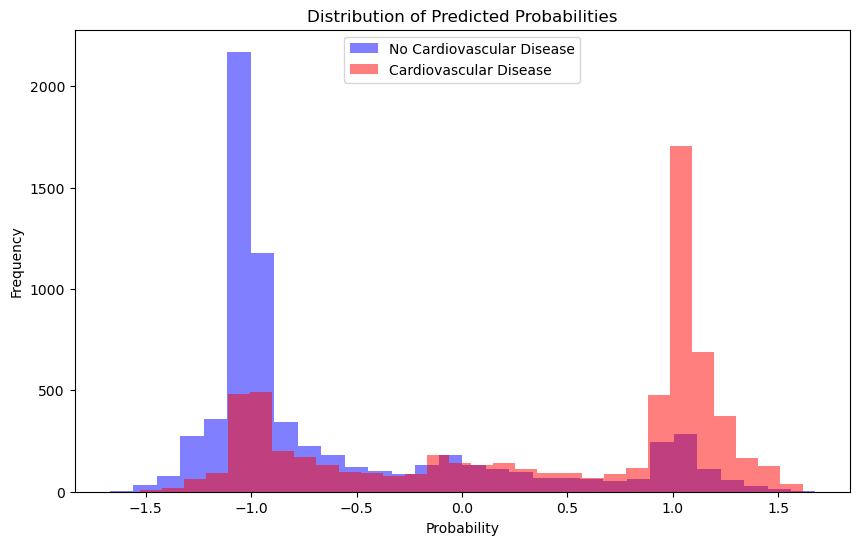

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(y_prob[y_test == 0], bins=30, alpha=0.5, label='No Cardiovascular Disease', color='blue')
plt.hist(y_prob[y_test == 1], bins=30, alpha=0.5, label='Cardiovascular Disease', color='red')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend(loc='upper center')
plt.show()


# Analisi della Distribuzione delle Probabilità Predette

Il grafico mostra la distribuzione delle probabilità predette per le due classi: **"No Cardiovascular Disease"** (blu) e **"Cardiovascular Disease"** (rosso). 

## Analisi Dettagliata

### 1. Separazione tra le classi
Le probabilità predette per le due classi si distribuiscono in modo distinto:
- **Classe blu (No Disease):** La maggior parte delle probabilità si concentra intorno a **-1** (probabilità più bassa di malattia).
- **Classe rossa (Disease):** La maggior parte delle probabilità si concentra intorno a **1** (probabilità alta di malattia).

---

### 2. Sovrapposizione
Esiste una regione di sovrapposizione tra **-0.5** e **0.5**, dove il modello non distingue chiaramente tra le due classi:
- **Impatto:** Questo potrebbe portare a errori di classificazione, in particolare **falsi positivi** o **falsi negativi**.

---

### 3. Distribuzione delle probabilità estreme
Le probabilità estreme (vicino a **-1** o **1**) mostrano una buona separazione tra le classi:
- **Osservazione:** Il modello è molto sicuro nel classificare correttamente questi campioni.


In [ ]:
import shap
import numpy as np

# SHAP KernelExplainer per modelli non probabilistici
explainer = shap.KernelExplainer(model.predict, X_test[:100])  # Usa un campione dei dati per efficienza
shap_values = explainer.shap_values(X_test[:100])

# Plot SHAP summary
shap.summary_plot(shap_values, X_test[:100])


  2%|▏         | 2/100 [24:24<20:02:17, 736.10s/it]